# Plotting with `plotnine`

The linchpin library for plotting in Python is without a doubt `matplotlib`. While infinitely flexible, however, for many applications `matplotlib` lacks user-friendly tools for quickly making common types of figures (scatter plots, linear fits, histograms, etc.). With that in mind, several other packages (most of which are actually built on `matplotlib`) have been created to provide a more user-friendly interface. Unlike in `matplotlib`, where you have to think in terms of the geometric objects you want to place on axes, all three of these alternative libraries allow for higher-level, more "declarative" code: 

- **[plotnine](https://plotnine.readthedocs.io/en/stable/index.html)** `plotnine` is designed to replicate the syntax of the extremely popular R package `ggplot` in Python. In most cases it works wonderfully. As a result, if you are already familiar with `ggplot`, `plotnine` is hard to beat.
- **[altair](https://altair-viz.github.io/)**: `altair`, like `plotnine` also has a clear philosophy that underlies its syntax, and seems to be relatively popular among pure python users. 
- **[seaborn](https://seaborn.pydata.org/)**: `seaborn` is also a declarative plotting language, although its syntax is a little less modular than `plotnine` or `altair` -- e.g. there is a distinct command for plotting histograms, a command for kernel densities, a command for bivariate fits, etc. But still *much* easier than `matplotlib`.

Given that many data scientists work in both R and Python (and indeed, this is required of MIDS students), in this course we will focus on `plotnine` to minimize the number of new tools students are required to learn. 

## Tutorial Attribution

The `plotnine` tutorial below is derived (with generous permission) from a [truely excellent tutorial for ggplot2](http://www.rebeccabarter.com/blog/2017-11-17-ggplot2_tutorial/) (written for R) by Rebecca Barter, who [hosts an excellent data science in R blog](http://www.rebeccabarter.com/). It is very close to her original materials, with changes made primarily to convert R `ggplot2` code into `plotnine` code (which is remakrably easy.

## Materials Outline

I will begin by providing an overview of the layered grammar of graphics upon which `plotnine` is built. I will then teach `plotnine` by layering examples ontop of one another. Finally, I will introduce some advanced topics such as faceting and themes.

0. `plotnine` for people already accustomed to `ggplot2`

1. Layered grammar of graphics

2. Basic `plotnine` plot types

In [Plotting, Part 2](plotting_part2.ipynb), well also get into different scales, axes, legend settings, faceting, themes, and other customizations. By the end of these two tutorials, you will be able to produce beautiful graphics such as this:

<img src="images/beautiful_plot.png" width="800">

## `plotnine` for `ggplot2` users

If you have lots of experience with `ggplot2`, then good news: `plotnine` is nearly identical (so much so that I intially assumed that the library was actually just running `ggplot2` in the background). As far as I can tell, the only two syntax differences to be aware of are:

1. **You have to wrap everything in parenthesis:** If a line in R ends in a plus sign, it recognizes that the code must continue onto the next line. Python treats this as an error. So when chaining layers, wrap your whole function with parenthesis (which results in Python recognizing code continues on the next line
2. **You have to make column names strings:** Because of a quirk in R, you can write the name of a column as a function argument without any quotation marks around it. But if Python sees a word without quotes, it assumes it's a variable, and throws an error. 

So basically instead of R code that looks like this: 

```R

ggplot(gapminder, aes(x=gdpPercap, y=lifeExp)) +
        geom_point()
```

you write this: 

```python
(ggplot(gapminder, aes(x='gdpPercap', y='lifeExp')) +
        geom_point()
)

```

And honestly, if you're a `ggplot` ace, you can probably stop right there! :) If not, read on!

## The layered grammar of graphics

Hadley Wickham built ggplot2 based on a set of principles outlines in his *layered grammar of graphics* (inspired by Wilkinson's orginal *grammar of graphics*). The basic idea is that a statistical graphic is a mapping from data to aesthetic attributes (such as colour, shape, and size) of geometric objects (such as points, lines, and bars).

We will use some of this terminology as we progess and discover that each piece of terminology corresponds to a type of object in ggplot2.

- **data**: a data frame containing the variables that you want to visualize

- **geoms**: geometric objects (circles, lines, text) that you will actually see

- **aesthetics**: the mapping from the data to the geographic objects (e.g. by describing position, size, colour, etc)

##  Basic plotnine

In this section, we are going to make our first plot. This plot will be based on the gapminder dataset on country wealth, demographics, and health outcomes. Below, we show the first 5 rows of the gapminder dataset.

In [1]:
import pandas as pd
from plotnine import *

gapminder = pd.read_csv("../example_data/gapminder-FiveYearData.csv")

# to download the data directly:
# gapminder <- pd.read_csv("https://raw.githubusercontent.com/swcarpentry/r-novice-gapminder/gh-pages/_episodes_rmd/data/gapminder-FiveYearData.csv")

gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


The first argument we will use is the `ggplot` function. This function allows us to define the data that we will be using to make the plot, as well as the aesthetic properties that will be mapped to the geometric objects. That is, we will tell ggplot which data (a data frame) we are interested in and how each of the variables in our dataset will be used (e.g. as an x or y coordinate, as a coloring variable or a size variable, etc).
    

Below, we define our first ggplot object using the `ggplot` function, with data on country wealth (GDP per capita) and life expectancy from [GapMinder](https://www.gapminder.org/) and the x and y aesthetics defined by the `gdpPercap` and `lifeExp` variables, respectively. 

The output of this function is a grid with `gdpPercap` as the x-axis and `lifeExp` as the y-axis. However, we have not yet told ggplot what type of geometric object the data will be mapped to, so no data has been displayed.

/Users/Nick/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):


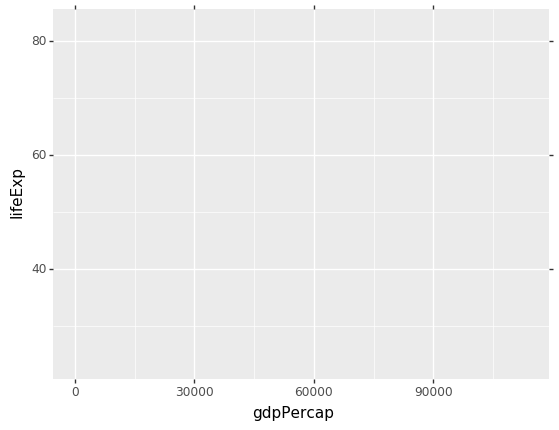

<ggplot: (7541526024)>

In [2]:
ggplot(gapminder, aes(x='gdpPercap', y='lifeExp'))

Note that `plotnine` currently throws a few depreciation warnings (just telling the package authors that their code needs to be updated at some point soon), so I will suppress those warnings here. Don't worry about them if you see them -- they'll be addressed in the next release of `plotnine`. 

In [3]:
import warnings
warnings.filterwarnings('ignore', module='plotnine')

### Aesthetic mapping to layers

What we have done is map each country (row) in the data to a point in the space defined by the GDP and life expectancy value. The end result is an ugly blob of points. Fortunately, there are many things that we can do to make this blob of points prettier.

For example, we can change the transparency of all points by setting the alpha argument to a low value, changing the color of the points to be blue instead of black, and making the points smaller.

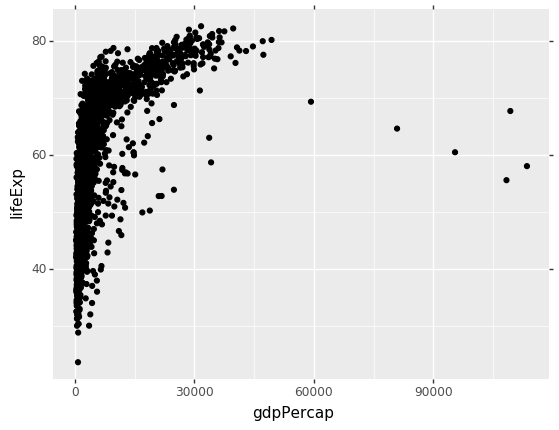

<ggplot: (7541531491)>

In [4]:
# describe the base ggplot object and tell it what data we are interested in along with the aesthetic mapping

# Note the need to wrap all the arguments in parentheses if you want to split your command onto multiple lines. 
# Unlike in R, you can't end a line with a `+`

(ggplot(gapminder, aes(x='gdpPercap', y='lifeExp')) +
        geom_point()
)

What we have done is map each country (row) in the data to a point in the space defined by the GDP and life expectancy value. The end result is an ugly blob of points. Fortunately, there are many things that we can do to make this blob of points prettier.

For example, we can change the transparency of all points by setting the alpha argument to a low value, changing the color of the points to be blue instead of black, and making the points smaller.

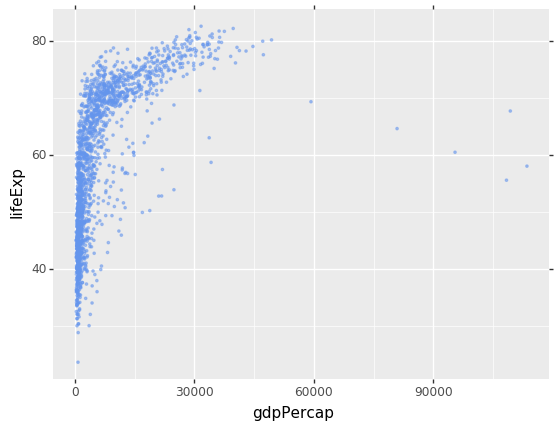

<ggplot: (7541526059)>

In [5]:
(ggplot(gapminder, aes(x='gdpPercap', y='lifeExp')) +
        geom_point(color='cornflowerblue', alpha = 0.5, size = 0.5)
)

Note that the above argument changed the alpha value and color for *all of the points at once*. 

One of the truly powerful features of ggplot2 is the ability to change these aesthetics based on the data itself. For example, perhaps we want to color each point by its `continent`. Instead of separating the data into five different subsets (based on the possible values of continent), and adding the different colored points separately, we can simply add all the points once and add an colour aesthetic map for `continent`.

Note that whenever we are using a variable from the data to describe an aesthetic property of a geom, this aesthetic property needs to be included in the `aes()` function.

In [6]:
gapminder.continent.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

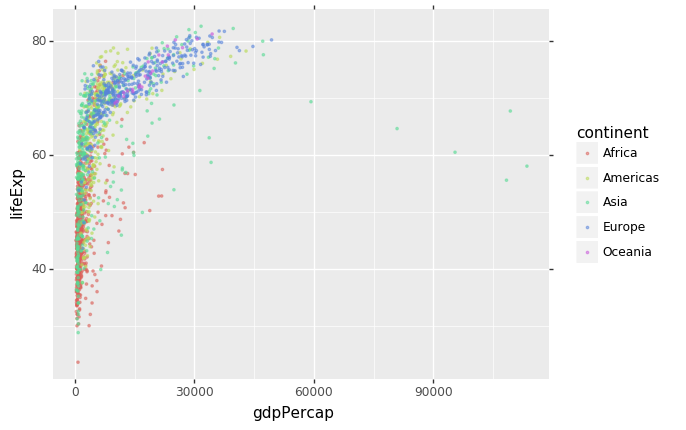

<ggplot: (-9223372029312882723)>

In [7]:
(ggplot(gapminder, aes(x='gdpPercap', y='lifeExp', color='continent')) +
        geom_point(alpha = 0.5, size = 0.5)
)

We could also add aesthetic mappings for other features such as shape, size, transparancy (alpha), and more! For example, changing the size based on population:

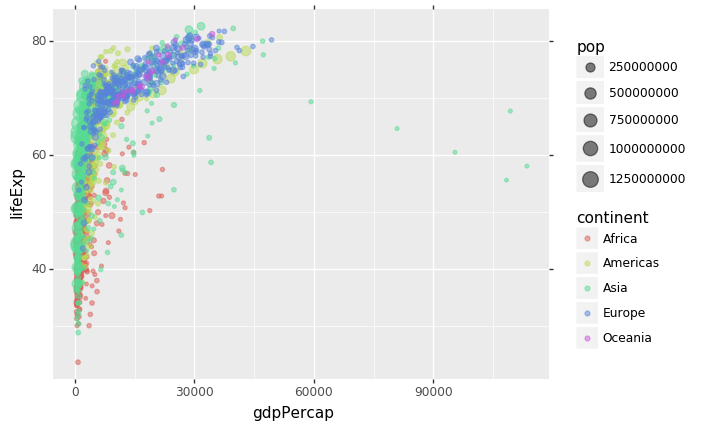

<ggplot: (-9223372029313258415)>

In [8]:
(ggplot(gapminder, aes(x='gdpPercap', y='lifeExp', color='continent', size='pop')) +
        geom_point(alpha = 0.5)
)

### Types of layers

So far, we have only seen scatterplots (point geoms), however, there are many other geoms we could add, including:

- lines

- histograms

- boxplots and violin plots

- barplots

- smoothed curves

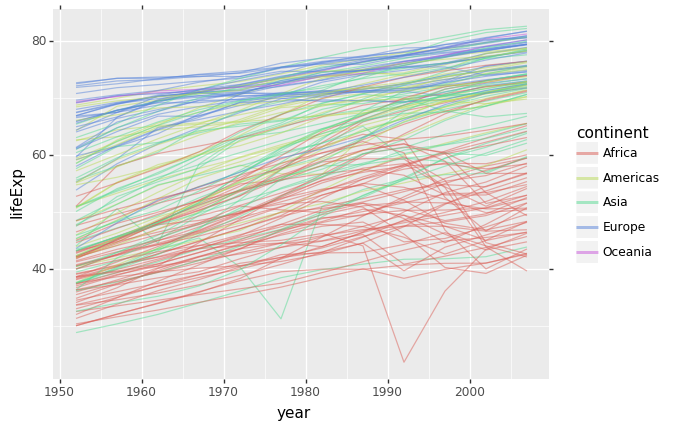

<ggplot: (-9223372029312625299)>

In [9]:
(ggplot(gapminder, aes(x='year', y='lifeExp', group='country', color='continent')) +
        geom_line(alpha = 0.5)
)

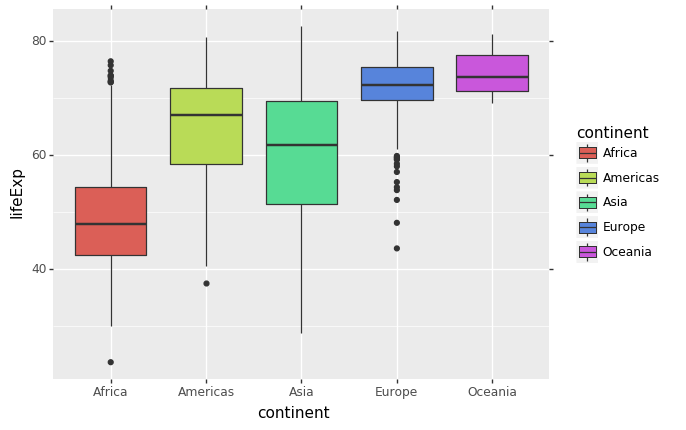

<ggplot: (7541675910)>

In [10]:
(ggplot(gapminder, aes(x='continent', y='lifeExp', fill='continent')) +
        geom_boxplot()
)

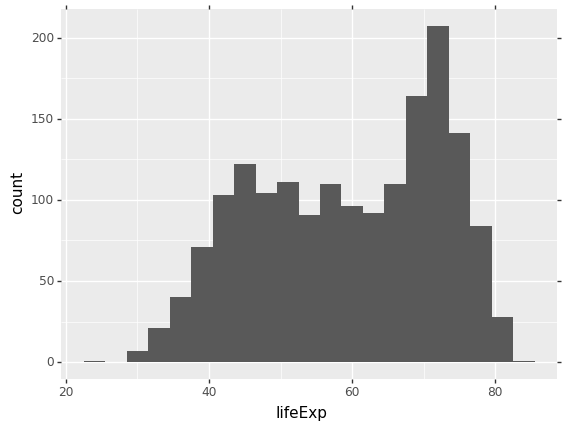

<ggplot: (-9223372029312888302)>

In [11]:
(ggplot(gapminder, aes(x='lifeExp')) + 
        geom_histogram(binwidth = 3)
)

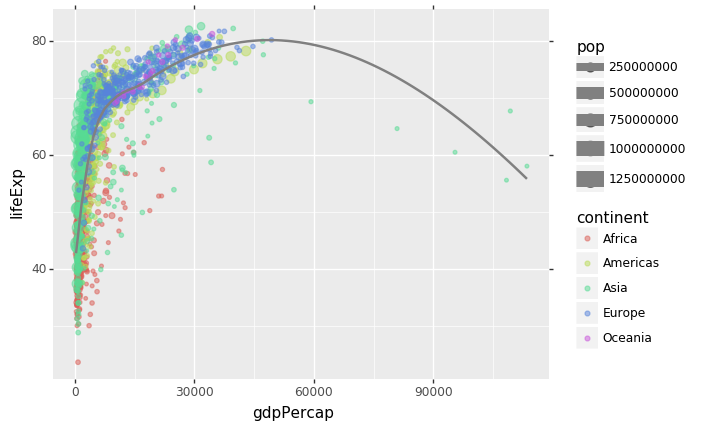

<ggplot: (7541648760)>

In [12]:
# Note that to run a loess smooth, you need to first run `pip install scikit-misc`. 

(ggplot(gapminder, aes(x='gdpPercap', y='lifeExp', size='pop')) +
        geom_point(aes(color='continent'), alpha = 0.5) +
        geom_smooth(se=False, method="loess", color="grey")
)

## Cheatsheet!

OK, that's a lot of different geometries. How are you supposed to remember all of them?

I suggested this [this excellent cheatsheet](https://github.com/rstudio/cheatsheets/blob/master/data-visualization-2.1.pdf). It was written for R, so there may be some very small syntactic differences from `plotnine`, but those differences are almost always very small. 

## Saving your plots

You can save your plots using the `ggsave()` function.

In [23]:
p = (ggplot(gapminder, aes(x='gdpPercap', y='lifeExp', size='pop')) +
        geom_point(aes(color='continent'), alpha = 0.5) +
        geom_smooth(se=False, method="loess", color="grey")
)
# save the plot
p.save("images/beautiful_plot_from_notebook.png")

## Exercises!

*If you are enrolled in Practical Data Science at Duke, don't do these exercises on your own -- we'll do them in class!*

[Plotting Exercises, Part 1](exercises/Exercise_plotting_part1.ipynb)